<p style="font-family: Arial; font-size:3.75em; font-style:bold"><br>
Image Data <br><br><br>Analysis using numpy</p>
<br>

<hr>
<br><br><p style="font-size:1.3em;">Reading images is one of the most common uses of a numpy array. An image can be represented as a 3 Dimensional numpy array. The color of every pixel in the image can be represented by 3 numbers, the RGB value of that pixel.</p>

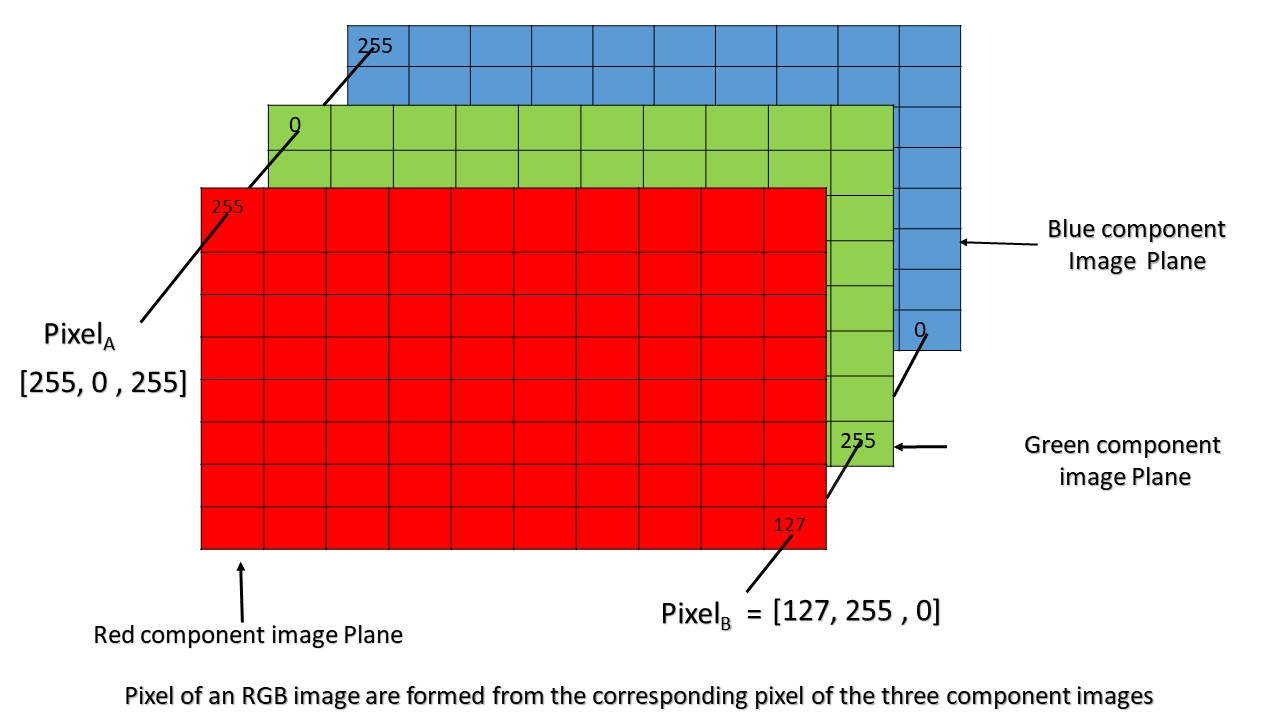

In [1]:
from IPython.display import Image
Image(filename='rgb.jpg' ,width=500)

<br>
<hr>

<p style="font-family: Arial; font-size:1.75em; font-style:bold">Loading the libraries we need: Numpy, Matplotlib</p>

In [2]:
%matplotlib inline
import numpy as np                   #Numpy for all the computations
import matplotlib.pyplot as plt      #Matplotlib to display the images

<p style="font-family: Arial; font-size:1.75em; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>


In [3]:
photo_data = plt.imread('Milky_way.jpg')  #Command to read images

<p style="font-size:1.3em;">Let's see what is in this image. </p>

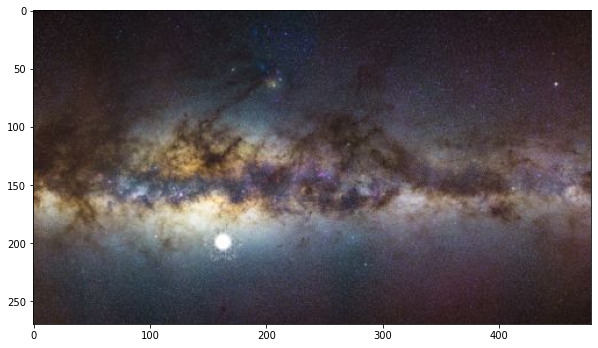

In [4]:
plt.figure(figsize=(10,10)) #Sets the size of the figure displayed
plt.imshow(photo_data);     #Command to display images

In [5]:
photo_data.size    #Total Number of pixels

388800

In [6]:
photo_data.min(),photo_data.max()   

(10, 255)

In [31]:
photo_data.shape
photo_data[:]


array([[[26, 17, 18],
        [21, 12, 13],
        [20, 11, 12],
        ...,
        [37, 25, 25],
        [38, 26, 26],
        [37, 25, 25]],

       [[31, 22, 23],
        [26, 17, 18],
        [24, 15, 16],
        ...,
        [36, 24, 24],
        [36, 24, 24],
        [34, 22, 22]],

       [[26, 17, 18],
        [24, 15, 16],
        [24, 15, 16],
        ...,
        [35, 23, 23],
        [34, 22, 22],
        [32, 20, 20]],

       ...,

       [[55, 44, 42],
        [56, 45, 43],
        [53, 42, 40],
        ...,
        [33, 22, 20],
        [33, 22, 20],
        [33, 22, 20]],

       [[59, 48, 46],
        [53, 42, 40],
        [49, 38, 36],
        ...,
        [34, 23, 21],
        [35, 24, 22],
        [35, 24, 22]],

       [[61, 50, 48],
        [50, 39, 37],
        [48, 37, 35],
        ...,
        [35, 24, 22],
        [36, 25, 23],
        [36, 25, 23]]], dtype=uint8)

<p style="font-size:1.3em;">The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.</p>

<br>

In [36]:

photo_data[ 0,0,:] #bottom left corner

array([26, 17, 18], dtype=uint8)

In [35]:

photo_data[ 269,0,:] #top left corner

array([61, 50, 48], dtype=uint8)

In [33]:

photo_data[ 0,479,:] #bottom right corner

array([37, 25, 25], dtype=uint8)

In [34]:


photo_data[ 269,479,:] #top right corner



array([36, 25, 23], dtype=uint8)

## Graded Task 1:
<p style="font-size:1.3em;">Find the value of the Red, Green and Blue channel at the 4 corners of the image<br><hr>

#### Lets now try to visualize the RGB channels of the image separately.<br>
<p style="font-size:1em;">
We do that by first creating 3 copies of the image for the red, blue and green channels respectively.<br>
We then set the green and blue channels to zero in the red image.<br>
Similar procedures are followed to generate the other images.<br>
Finally, we concatenate the images to display them at the same time.<br>

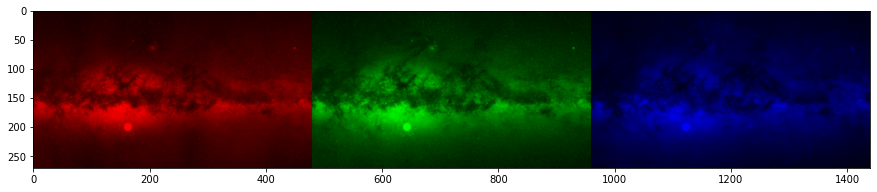

In [9]:
img_R, img_G, img_B = photo_data.copy(), photo_data.copy(), photo_data.copy()  #Creating 3 copies
img_R[:, :, (1, 2)] = 0   #Setting the blue and green channels to 0
img_G[:, :, (0, 2)] = 0   #Setting the red and blue channels to 0
img_B[:, :, (0, 1)] = 0   #Setting the red and green channels to 0


img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)   #Concatenating the images to view them at once
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

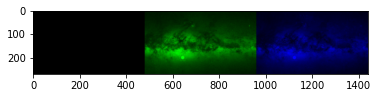

In [10]:
img_r1 =img_rgb.copy()
img_r1[:,:,0] = 0
plt.imshow(img_r1)

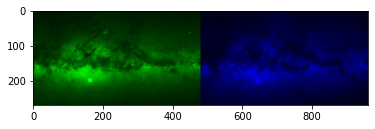

In [11]:
img_r2 =img_rgb.copy()
img_r2 =np.concatenate((img_G,img_B), axis=1)
plt.imshow(img_r2)


## Graded Task 2:<br>
Following a similar procedure as above, create an image by removing the red channel from the given channel only, leaving the blue and green channels intact.<br>
<hr>



## Now we make some basic edits to the image

### a) Cropping

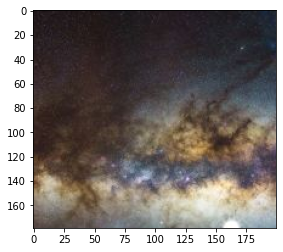

In [12]:
crop_img = photo_data[20:199,:200,:]     
imgplot = plt.imshow(crop_img)

### b) Grayscale.
We can also use NumPy for transforming the image into a grayscale image.<br>
We have set weighted means for each of the channels and we create a grayscale image by taking a dot product with the weights

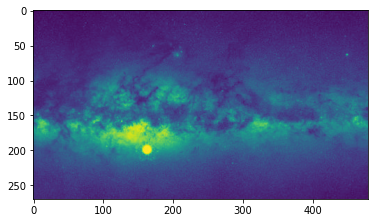

In [13]:
rgb_weights = [0.2989, 0.5870, 0.1140]                #Mean weights of the rgb channels
grayscale_image = np.dot(photo_data, rgb_weights)     #Dot product
imgplot = plt.imshow(grayscale_image)

### c) Simple Filters

We start with a filter to reduce very bright pixels. Any pixel where the blue pixel has a value greater than 150, we clip to 150.


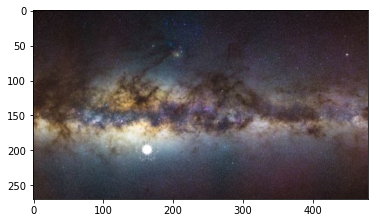

In [14]:
img_150 = (photo_data[:,:,0] > 150)      #Boolean array having true false values based on the condition
img=photo_data.copy()
img[img_150]=150                         #Clipping the value to a 150 where the img_150 is true
plt.imshow(img)
np.shape(img_150)
plt.imshow(photo_data)


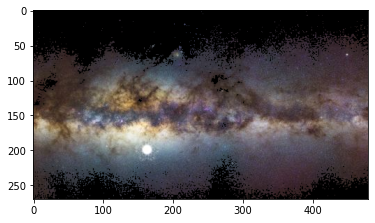

In [15]:
img_50 = (photo_data[:,:,0] <50 )      
local_img=photo_data.copy()
local_img[img_50]=0                         

np.shape(img_50)
plt.imsave('assignment_numpy1.jpeg', local_img)
plt.imshow(local_img)

## Graded Task 3:
<p>Create a filter for the image which sets all the pixels lesser than 50 in the Red Channel, to 0.<br>
Figure out how to save the image and upload the image to your Google Drive.<br>
Enter the link to the drive in the form that will be floated.<br>
Make sure to have the drive link viewable to everyone.<br></p>
<hr>

## Ungraded Task:
### Pick any image of your choice and perform all the above tasks on that.
<hr>